# Logistic Regression 

En este proyecto, trabajaremos con un conjunto de datos publicitarios falsos, que indica si un usuario de Internet en particular hizo clic en un anuncio en el sitio web de una empresa. Intentaremos crear un modelo que predecirá si harán clic o no en un anuncio en función de las características de ese usuario.

Este conjunto de datos contiene las siguientes características:

* 'Daily Time Spent on Site': tiempo del consumidor en el sitio en minutos
* 'Age': edad cliente en años
* 'Area Income': promedio renta del área geográfica del consumidor
* 'Daily Internet Usage': promedio minutos al día que el consumidor está en Internet
* 'Ad Topic Line': título del anuncio
* 'City': ciudad del consumidor
* 'Male': si el consumidor era hombre o no
* 'Country': país del consumidor
* 'Timestamp': hora a la que el consumidor hizo clic en el anuncio o en la ventana cerrada
* 'Clicked on Ad': 0 o 1 indicado si el cliente realiza clic en el anuncio

## Import Libraries

In [5]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!{sys.executable} -m pip install seaborn
import seaborn as sns
%matplotlib inline

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 216 kB 143 kB/s eta 0:00:01
     |████████████████████████████████| 24.8 MB 767 bytes/s  0:00:01
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


## Get the Data

**Check the head of ad_data**

In [6]:
data = pd.read_csv('advertising.csv')

In [7]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Usar info() y describe() para obtener un análisis general de la información**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [48]:
data.astype({
    'Clicked on Ad': 'float',
    'Male': 'float'
})

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,NaN,Tunisia,2016-03-27 00:53:11,NaN
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,2016-04-04 01:39:02,NaN
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,NaN,San Marino,2016-03-13 20:35:42,NaN
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,2016-01-10 02:31:19,NaN
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,NaN,Iceland,2016-06-03 03:36:18,NaN
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1.0,Lebanon,2016-02-11 21:49:00,1.0
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1.0,Bosnia and Herzegovina,2016-04-22 02:07:01,1.0
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1.0,Mongolia,2016-02-01 17:24:57,1.0
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,NaN,Guatemala,2016-03-24 02:35:54,NaN


In [9]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis


**Histograma Edad**
Crear un histograma sobre la columna Age

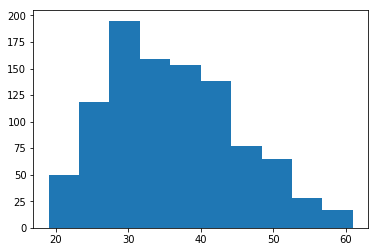

In [10]:
plt.hist(data['Age'])
plt.show()

**Crear un jointplot que muestre la relación de la edad vs los ingresos del área** Utilizar la librería seaborn. Interprete la gráfica.

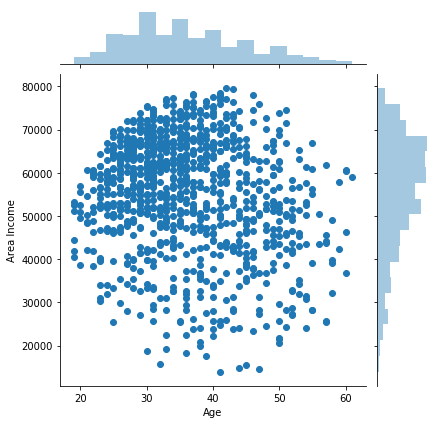

In [11]:
sns.jointplot(data=data, x="Age", y="Area Income")

**Crear un jointplot que muestre la distribución k de la relación de la edad vs el tiempo que diario empleado**

A la función jointplot agregue los argumentos color='red' y kind='kde'

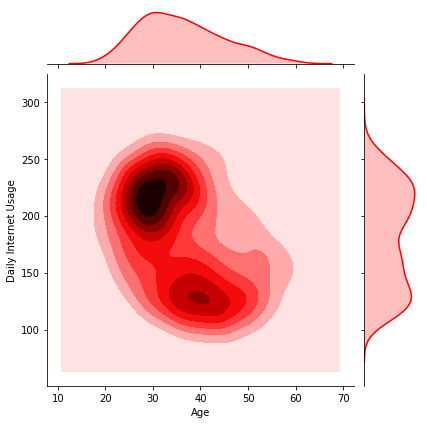

In [12]:
sns.jointplot(data=data, x="Age", y="Daily Internet Usage", color="red", kind="kde")

**Crear un jointplot del Daily Time Spent on Site vs. Daily Internet Usage**

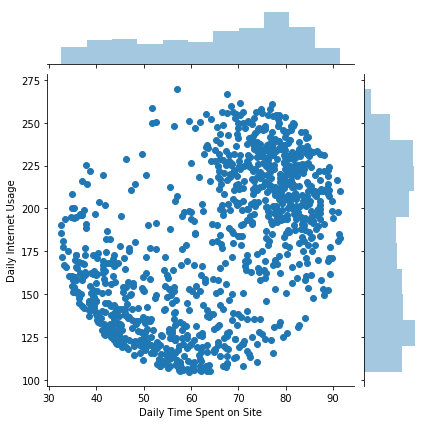

In [13]:
sns.jointplot(data=data, x="Daily Time Spent on Site", y="Daily Internet Usage")

**Finalmente, crear un pairplot que separe las poblaciones de 'Clicked on Ad'** Utilice el argumento hue y puede colocar un palette='bwr'

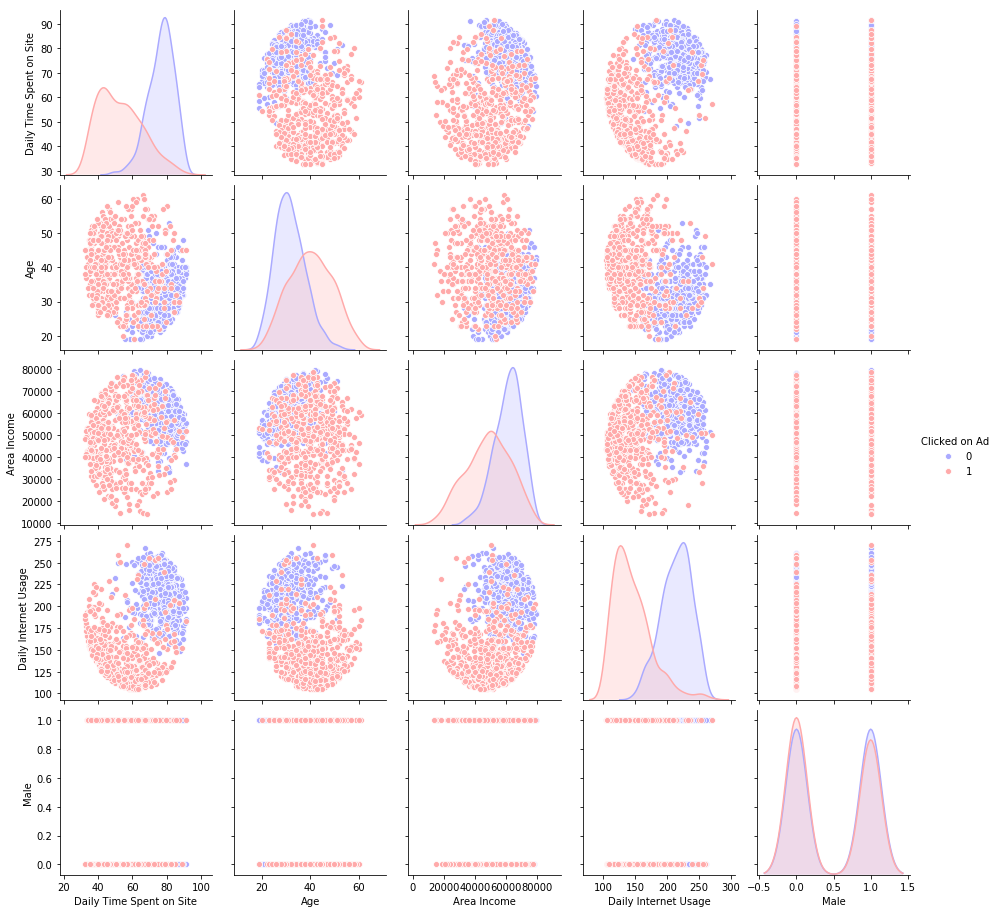

In [14]:
sns.pairplot(data=data, hue="Clicked on Ad", palette="bwr")

# Logistic Regression


¡Ahora es el momento de hacer una prueba de train/test splot y entrenar nuestro modelo!

Aquí tendrás la libertad de elegir las columnas en las que quieras entrenar.

In [16]:
!{sys.executable} -m pip install sklearn
from sklearn.model_selection import train_test_split

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 5.5 MB 175 kB/s eta 0:00:01
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn ... done
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [17]:
X = data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = data['Clicked on Ad']

**Usar train_test_split para generar X_train, X_test, y_train y y_test con un 33% en el split para split**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

**Entrene y ajuste un modelo de regresión logística en el conjunto de entrenamiento.**

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/home/marco/.local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Predictions and Evaluations
**Ahora predecir los valores para los datos de prueba.**

In [21]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,

**Crear un reporte de classificación (classification_report) para el mdoelo.**

In [22]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       183
           1       0.88      0.90      0.89       147

   micro avg       0.90      0.90      0.90       330
   macro avg       0.90      0.90      0.90       330
weighted avg       0.90      0.90      0.90       330



**Imprima el confussion matrix de la clasificación**

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_test, clf.predict(X_test))

array([[165,  18],
       [ 14, 133]])

## Extra (Random Forest)

Aplique la clasificación utilizando Random Forest y compare los resultados

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
clf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)

/home/marco/.local/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [31]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       183
           1       0.95      0.95      0.95       147

   micro avg       0.95      0.95      0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330



In [32]:
confusion_matrix(y_test, clf.predict(X_test))

array([[175,   8],
       [  8, 139]])